# Introduction à Qiskit

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import RZGate

# Circuits quantiques paramétrés

Dans le contexte des algorithmes variationnels, il est souvent nécessaire d'exécuter plusieurs expériences avec la même architecture de circuit, où les paramètres des portes sont mis à jour entre les exécutions. Plutôt que d'avoir à reconstruire le circuit à chaque fois, nous sommes en mesure de créer des circuits paramétrés où les valeurs des paramètres des portes n'ont pas besoin d'être spécifiées avant l'exécution. 

Les portes et les circuits paramétrés peuvent être instanciés à l'aide de l'objet ``Parameter``.

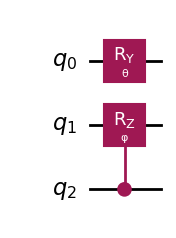

In [2]:
from qiskit.circuit import Parameter, ParameterVector

# Créer une paire d'objets paramètres
theta = Parameter("θ")
phi = Parameter("φ")

param_qc = QuantumCircuit(3)

# Ajouter une porte ry paramétrée
param_qc.ry(theta, 0)

# Ajouter une rotation Z contrôlée paramétrée
p_cry = RZGate(phi).control(1)
param_qc.append(p_cry, [2, 1])

param_qc.draw("mpl")

Lorsqu'un grand nombre de paramètres est nécessaire, il est plus pratique d'utiliser un ``ParameterVector`` (vecteur de paramètres).

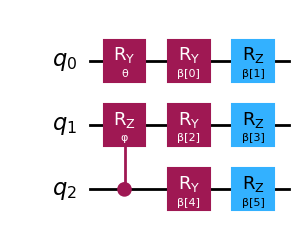

In [3]:
# Instancier un ParameterVector de longueur 6
beta = ParameterVector("β", 6)

# Ajouter de nombreuses portes paramétrées au circuit
for i in range(3):
    param_qc.ry(beta[2 * i], i)
    param_qc.rz(beta[2 * i + 1], i)
param_qc.draw("mpl")

### Affectation des paramètres

Une fois qu'un circuit paramétré a été créé, il faut attribuer des valeurs numériques à ses paramètres avant de pouvoir l'exécuter sur l'instance quantique. Une façon de le faire est d'utiliser la méthode ```assign_parameters()```. Par défaut, cette méthode n'est pas *in place* (sur place), et retourne une autre instance de ```QuantumCircuit```.

Il y a deux entrées possibles à ```assign_parameters()```. Si vous lui donnez une liste de valeurs, les valeurs seront liées aux paramètres dans l'ordre dans lequel ils sont stockés dans l'objet circuit. Il s'agit de l'ordre alphabétique des noms, et NON de l'ordre des portes dans le circuit ! Faites attention aux valeurs attribuées aux paramètres !

Si vous souhaitez éviter les problèmes d'ordre, vous pouvez lui passer un dictionnaire de la forme ```{Paramètre : valeur, ParametersVector : [valeurs]}```.

ParameterView([ParameterVectorElement(β[0]), ParameterVectorElement(β[1]), ParameterVectorElement(β[2]), ParameterVectorElement(β[3]), ParameterVectorElement(β[4]), ParameterVectorElement(β[5]), Parameter(θ), Parameter(φ)])
True


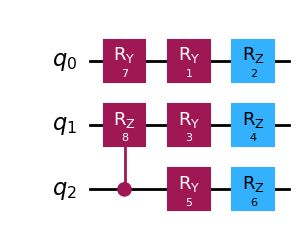

In [4]:
# Vérifier l'ordre dans lequel les paramètres sont stockés
print(param_qc.parameters)

# Assigner des paramètres à l'aide d'une liste
assigned_qc_list = param_qc.assign_parameters([1, 2, 3, 4, 5, 6, 7, 8])

# Assigner des paramètres à l'aide d'un dictionnaire
param_qc.assign_parameters({beta: [1, 2, 3, 4, 5, 6], theta: 7, phi: 8}, inplace=True)

# Vérifier que les deux méthodes sont équivalentes
print(assigned_qc_list == param_qc)

assigned_qc_list.draw("mpl")

### Exercice

Préparez l'ansatz paramétré suivant :

  ![ansatz](./images/ansatz.png)

 puis trouvez et affectez-lui les valeurs des paramètres qui donneront le vecteur d'état suivant

  ![circuit1](./images/statevec.png)

  Vous pouvez utiliser la méthode ``plot_statevector()`` fournie pour visualiser le vecteur d'état produit par votre circuit. 


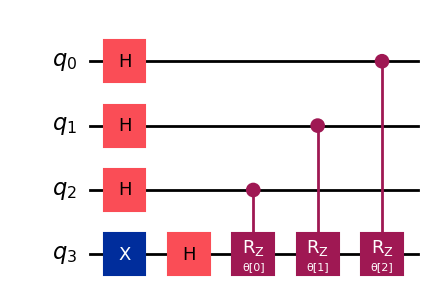

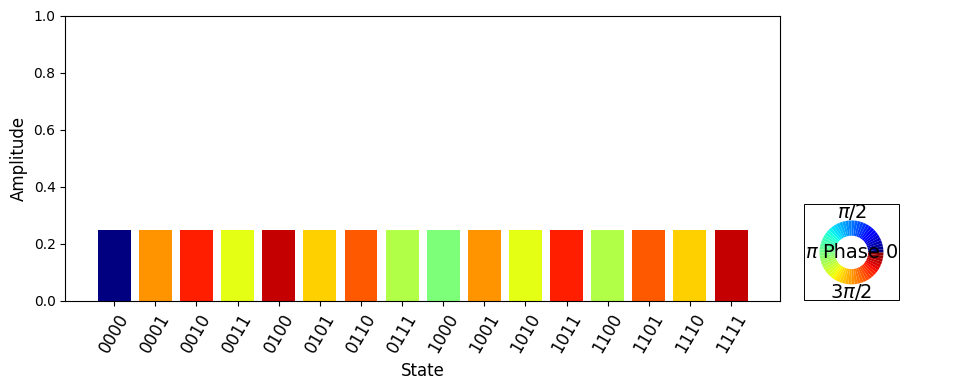

In [21]:
from utils import plot_statevector
import numpy as np
from qiskit.circuit import Parameter
%matplotlib inline



# Define individual parameters
thetas = [Parameter(f"θ[{i}]") for i in range(3)]

qc = QuantumCircuit(4)
for i in range(4):
    if i == 3:
        qc.x(i)
    qc.h(i)
for i in [2, 1, 0]:
    qc.crz(thetas[2 - i], i, 3)  # CRZ with θ[0], θ[1], θ[2] (in reverse)

qc.draw("mpl")

# Optionally bind parameters for simulation
bound_qc = qc.assign_parameters({
    thetas[0]: np.pi / 4,
    thetas[1]: np.pi / 2,
    thetas[2]: np.pi
})

plot_statevector(bound_qc)
